In [1]:
#1
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
C:\Users\Admin\anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\anaconda3\envs\keras\lib\site-pa

In [7]:
#2
movie_reviews = pd.read_csv("IMDB Dataset.csv")
movie_reviews.isnull().values.any()
movie_reviews.shape

(50000, 2)

In [65]:
movie_reviews.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
word_count0 = movie_reviews['review'].str.lower().str.len()

In [6]:
word_count0.describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review, dtype: float64

Text(0.5, 1.0, 'Kernel Distribution of Number of words')

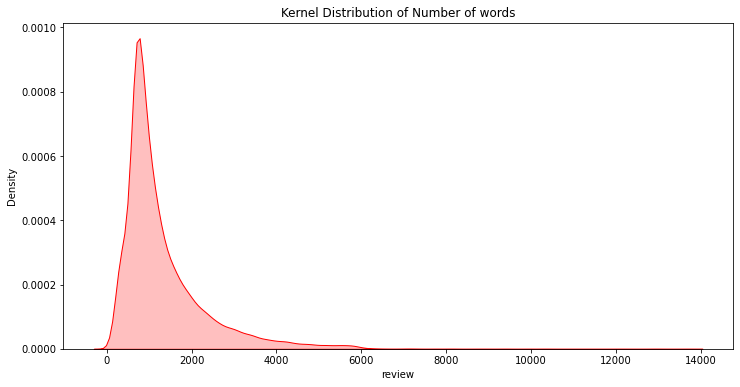

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.kdeplot(word_count0,shade=True,color='r').set_title('Kernel Distribution of Number of words')

In [3]:
def preprocess_text(data):
    stop = stopwords.words('english')
    punct = '''!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~'''
    #print(stop)
    data['review'] = data['review'].replace({'<.*?>': ''}, regex = True)  
    #Make lower
    data['review'] = data['review'].str.lower()
    #Remove stopwords
    data['review'] = data['review'].apply(lambda x:' '.join([words for words in x.split() if words not in stop]))
    #Remove punctuations
    data['review'] = data['review'].replace({'<.*?>': ''}, regex = True)  
    data['word_count'] = data['review'].str.split().str.len()
    return data
movie_reviews = preprocess_text(movie_reviews)
movie_reviews.head()

review sentiment  word_count
0  one reviewers mentioned watching 1 oz episode ...  positive         168
1  wonderful little production. filming technique...  positive          87
2  thought wonderful way spend time hot summer we...  positive          86
3  basically there's family little boy (jake) thi...  negative          70
4  petter mattei's "love time money" visually stu...  positive         125

In [22]:
movie_reviews['word_count'].describe()

count    50000.000000
mean       122.363760
std         92.070197
min          3.000000
25%         66.000000
50%         91.000000
75%        149.000000
max       1452.000000
Name: word_count, dtype: float64

Text(0.5, 1.0, 'Kernel Distribution of Number of words')

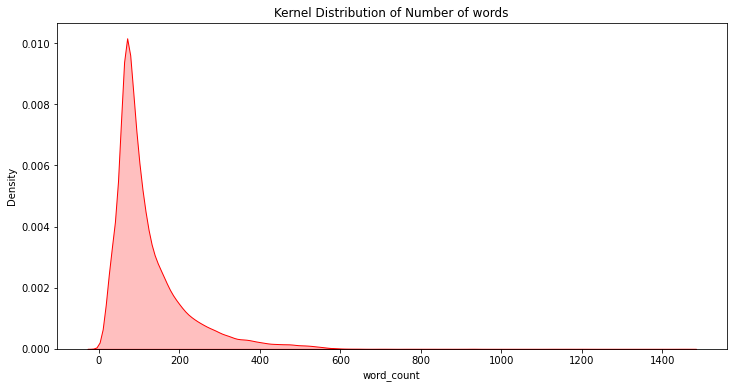

In [23]:
plt.figure(figsize=(12,6))
sns.kdeplot(movie_reviews['word_count'],shade=True,color='r').set_title('Kernel Distribution of Number of words')

In [5]:
#3
movie_reviews = pd.read_csv("IMDB Dataset.csv")

def preprocess_text(data):
    stop = stopwords.words('english')
    punct = '''!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~'''
    #print(stop)
    data['review'] = data['review'].replace({'<.*?>': ''}, regex = True)  
    #Make lower
    data['review'] = data['review'].str.lower()
    #Remove stopwords
    data['review'] = data['review'].apply(lambda x:' '.join([words for words in x.split() if words not in stop]))
    #Remove punctuations
    data['review'] = data['review'].replace({'<.*?>': ' '}, regex = True)  
    data['review'] = data['review'].replace({'[^a-zA-Z]': ' '}, regex = True)
    data['review'] = data['review'].replace({'[0-9]': ' '}, regex = True)
    data['review'] = data['review'].replace({r"\s+[a-zA-Z]\s+": ' '}, regex = True)
    data['review'] = data['review'].replace({r'\s+': ' '}, regex = True)
    data['word_count'] = data['review'].str.split().str.len()
    
    return data
movie_reviews = preprocess_text(movie_reviews)
movie_reviews.head()
X = movie_reviews['review']

In [6]:
#4
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.20,random_state=42)
print(X_train0)
print(sum(y_train0))

39087    that kept asking many fights screaming matches...
30893    watch entire movie could watch entire movie st...
45278    touching love story reminiscent in mood love d...
16398    latter day fulci schlocker totally abysmal con...
13653    first all firmly believe norwegian movies cont...
                               ...                        
11284     shadow magic recaptures joy amazement first m...
44732    found movie quite enjoyable fairly entertainin...
38158    avoid one terrible movie exciting pointless mu...
860      production quite surprise me absolutely love o...
15795    decent movie although little bit short time me...
Name: review, Length: 40000, dtype: object
19961


In [7]:
#####
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train0)
X_train = tokenizer.texts_to_sequences(X_train0)
X_test = tokenizer.texts_to_sequences(X_test0)

In [8]:
##
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(vocab_size)

92546


In [10]:
##
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix    

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38251001,  0.14821   ,  0.60601002, ...,  0.058921  ,
         0.091112  ,  0.47283   ],
       [ 0.19915999, -0.049702  ,  0.24579   , ..., -0.068109  ,
         0.017651  ,  0.06455   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37771001,  0.22946   , -0.30311   , ..., -0.33610001,
         0.02637   , -0.72302002],
       [ 0.99882001,  0.044     ,  0.58508003, ..., -0.54869002,
         0.15141   ,  1.36880004]])

In [8]:
##
embedding_matrix[1]

array([ 0.38251001,  0.14821   ,  0.60601002, -0.51533002,  0.43992001,
        0.061053  , -0.62716001, -0.025385  ,  0.16429999, -0.22101   ,
        0.14422999, -0.37213001, -0.21683   , -0.08895   ,  0.097904  ,
        0.65609998,  0.64455003,  0.47698   ,  0.83849001,  1.64859998,
        0.88922   , -0.1181    , -0.012465  , -0.52082002,  0.77854002,
        0.48723   , -0.014991  , -0.14127   , -0.34746999, -0.29595   ,
        0.1028    ,  0.57191002, -0.045594  ,  0.026443  ,  0.53816003,
        0.32257   ,  0.40788001, -0.043599  , -0.146     , -0.48346001,
        0.32036   ,  0.55085999, -0.76258999,  0.43268999,  0.61752999,
       -0.36502999, -0.60598999, -0.79615003,  0.39289999, -0.23668   ,
       -0.34718999, -0.61201   ,  0.54746997,  0.94812   ,  0.20941   ,
       -2.77710009, -0.60219997,  0.8495    ,  1.25489998,  0.017893  ,
       -0.041901  ,  2.11470008, -0.026618  , -0.28104001,  0.68124002,
       -0.14165001,  0.99248999,  0.49879   , -0.67537999,  0.64

In [11]:
##
embeddsnn = embedding_matrix  
snn = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embeddsnn], input_length=maxlen , trainable=True)
snn.add(embedding_layer)
snn.add(Flatten())
snn.add(Dense(1, activation='sigmoid'))
snn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(snn.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          9254600   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 9,264,601
Trainable params: 9,264,601
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
##
y_train = y_train0
y_test = y_test0
history = snn.fit(X_train, y_train, batch_size=128,
                  epochs=6, verbose=1, validation_split=0.2)


Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 54s 2ms/step - loss: 0.5166 - acc: 0.7402 - val_loss: 0.3976 - val_acc: 0.8296
Epoch 2/6
32000/32000 [==============================] - 52s 2ms/step - loss: 0.3077 - acc: 0.8746 - val_loss: 0.3516 - val_acc: 0.8529
Epoch 3/6
32000/32000 [==============================] - 52s 2ms/step - loss: 0.2235 - acc: 0.9147 - val_loss: 0.3353 - val_acc: 0.8597
Epoch 4/6
32000/32000 [==============================] - 52s 2ms/step - loss: 0.1613 - acc: 0.9458 - val_loss: 0.3421 - val_acc: 0.8609
Epoch 5/6
32000/32000 [==============================] - 52s 2ms/step - loss: 0.1163 - acc: 0.9695 - val_loss: 0.3579 - val_acc: 0.8581
Epoch 6/6
32000/32000 [==============================] - 52s 2ms/step - loss: 0.0817 - acc: 0.9851 - val_loss: 0.3760 - val_acc: 0.8576


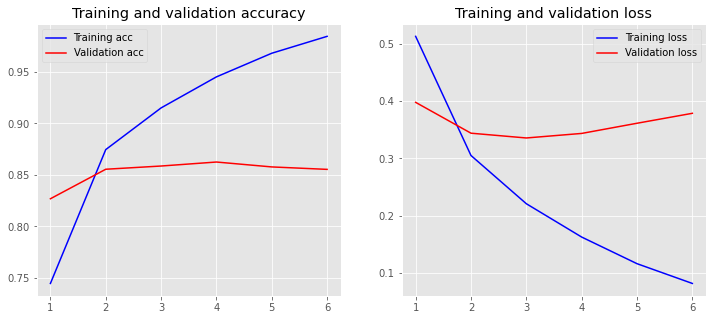

In [12]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [13]:
##
score = snn.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

10000/10000 [==============================] - 0s 48us/step
Test Score: 0.37356876606941225
Test Accuracy: 0.8568000197410583


In [13]:
##
predictions = snn.predict(X_test)
y_test_pred = snn.predict(X_test)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
aucSNN = roc_auc_score(y_test, y_test_pred)
aucSNN

0.9329498806707399

In [14]:
##
df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_test_pred})

C:\Users\Admin\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


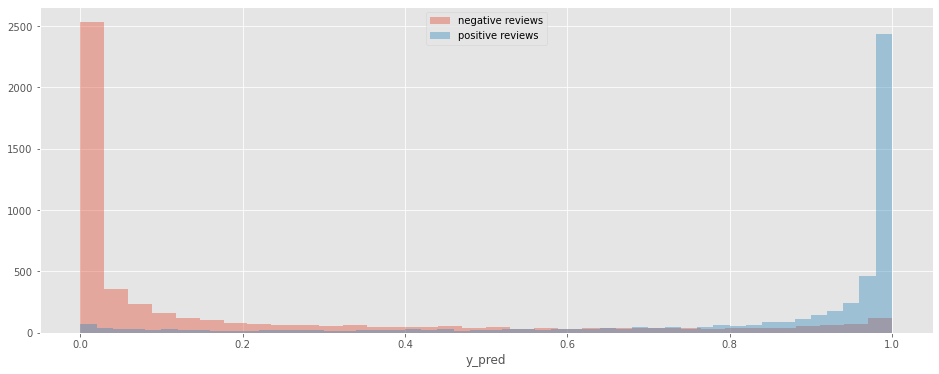

In [16]:
##
plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)
plt.legend()

In [15]:
##
from sklearn import metrics
fpr_snn, tpr_snn, thresholds_snn = metrics.roc_curve(y_test, y_test_pred)

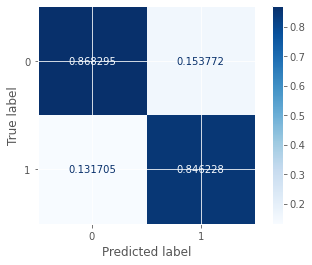

In [18]:
##
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = snn.predict(X_test)

y_pre = np.array(list(map(lambda x: 1 if x>= 0.5 else 0, predictions)))
cm_snn = confusion_matrix(y_test, y_pre, normalize='pred')
                 
disp = ConfusionMatrixDisplay(confusion_matrix=cm_snn)
disp.plot(cmap=plt.cm.Blues,values_format='g') 

In [16]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
embedcnn = embedding_matrix
cnn = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedcnn], input_length=maxlen , trainable=True)
cnn.add(embedding_layer)
cnn.add(Conv1D(128, 5, activation='relu'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [22]:
print(cnn.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          9254600   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 9,318,857
Trainable params: 9,318,857
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = cnn.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 68s 2ms/step - loss: 0.4511 - acc: 0.7838 - val_loss: 0.3341 - val_acc: 0.8576
Epoch 2/6
32000/32000 [==============================] - 67s 2ms/step - loss: 0.2807 - acc: 0.8857 - val_loss: 0.2993 - val_acc: 0.8742
Epoch 3/6
32000/32000 [==============================] - 68s 2ms/step - loss: 0.2077 - acc: 0.9243 - val_loss: 0.2897 - val_acc: 0.8786
Epoch 4/6
32000/32000 [==============================] - 68s 2ms/step - loss: 0.1521 - acc: 0.9506 - val_loss: 0.3132 - val_acc: 0.8677
Epoch 5/6
32000/32000 [==============================] - 68s 2ms/step - loss: 0.1059 - acc: 0.9719 - val_loss: 0.3085 - val_acc: 0.8758
Epoch 6/6
32000/32000 [==============================] - 67s 2ms/step - loss: 0.0674 - acc: 0.9883 - val_loss: 0.3181 - val_acc: 0.8773


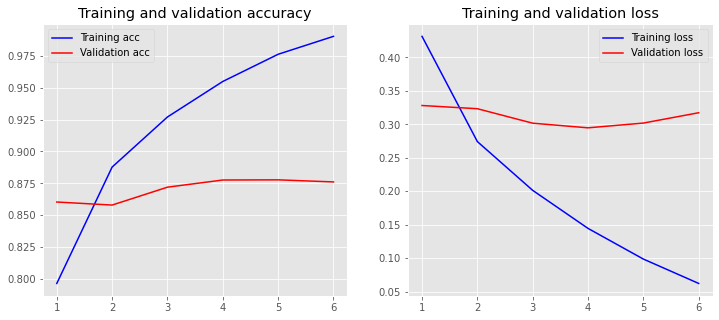

In [24]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [25]:
score = cnn.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

10000/10000 [==============================] - 3s 309us/step
Test Score: 0.31123707803487777
Test Accuracy: 0.8784000277519226


In [18]:
predictions = cnn.predict(X_test)
y_test_pred = cnn.predict(X_test)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
aucCNN = roc_auc_score(y_test, y_test_pred)
aucCNN

0.950435284482708

In [19]:
df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_test_pred})

C:\Users\Admin\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


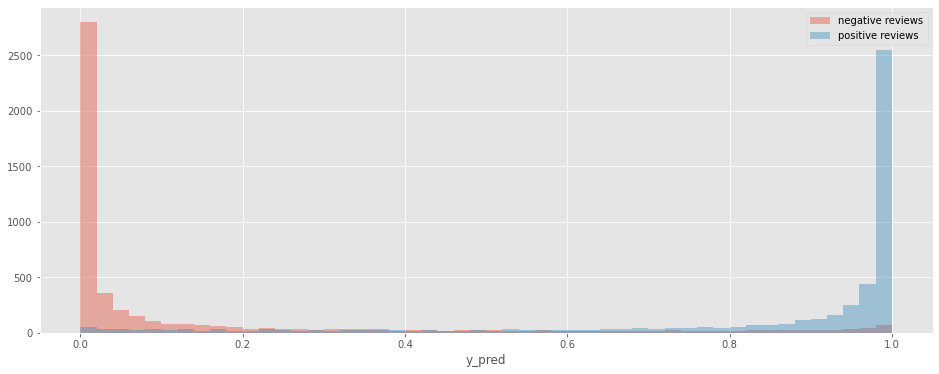

In [29]:
##
plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)
plt.legend()

In [20]:
from sklearn import metrics
fpr_cnn, tpr_cnn, thresholds_cnn = metrics.roc_curve(y_test, y_test_pred)

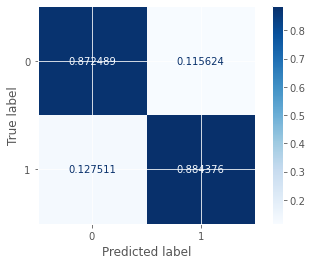

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = cnn.predict(X_test)

y_pre = np.array(list(map(lambda x: 1 if x>= 0.5 else 0, predictions)))
cm_cnn = confusion_matrix(y_test, y_pre, normalize='pred')
                 
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn)
disp.plot(cmap=plt.cm.Blues,values_format='g') 

In [21]:
from keras.layers import LSTM
embedlstm = embedding_matrix
lstm = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix],
                            input_length=maxlen , trainable=True)
lstm.add(embedding_layer)
lstm.add(LSTM(128))

lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          9254600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 9,371,977
Trainable params: 9,371,977
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
history = lstm.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 116s 4ms/step - loss: 0.4648 - acc: 0.7807 - val_loss: 0.3392 - val_acc: 0.8556
Epoch 2/6
32000/32000 [==============================] - 111s 3ms/step - loss: 0.3253 - acc: 0.8665 - val_loss: 0.2939 - val_acc: 0.8771
Epoch 3/6
32000/32000 [==============================] - 114s 4ms/step - loss: 0.2665 - acc: 0.8942 - val_loss: 0.3025 - val_acc: 0.8806
Epoch 4/6
32000/32000 [==============================] - 130s 4ms/step - loss: 0.2350 - acc: 0.9078 - val_loss: 0.2937 - val_acc: 0.8791
Epoch 5/6
32000/32000 [==============================] - 124s 4ms/step - loss: 0.2169 - acc: 0.9196 - val_loss: 0.3092 - val_acc: 0.8802
Epoch 6/6
32000/32000 [==============================] - 119s 4ms/step - loss: 0.2025 - acc: 0.9248 - val_loss: 0.3362 - val_acc: 0.8794


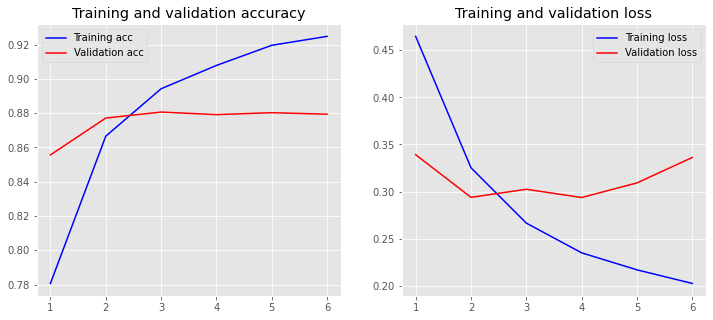

In [23]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [37]:
score = lstm.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

10000/10000 [==============================] - 10s 997us/step
Test Score: 0.2940447967886925
Test Accuracy: 0.8798999786376953


In [24]:
predictions = lstm.predict(X_test)
y_test_pred = lstm.predict(X_test)
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0],)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
aucLSTM = roc_auc_score(y_test, y_test_pred)
aucLSTM

0.9473600973883252

In [25]:
df_pred = pd.DataFrame(data={'y_actual': y_test, 'y_pred': y_test_pred})

C:\Users\Admin\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


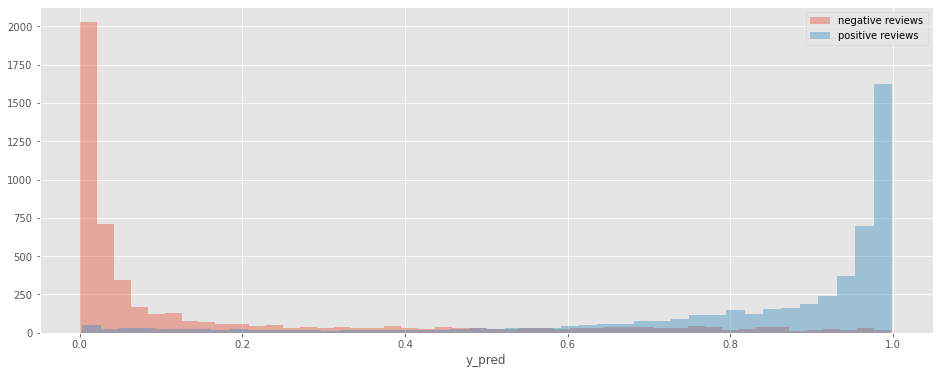

In [40]:
##
plt.figure(figsize=(16, 6))

msk = df_pred['y_actual'] == 0
sns.distplot(df_pred.loc[msk, 'y_pred'], label='negative reviews', kde=False)
sns.distplot(df_pred.loc[~msk, 'y_pred'], label='positive reviews', kde=False)
plt.legend()

In [26]:
from sklearn import metrics
fpr_lstm, tpr_lstm, thresholds_lstm = metrics.roc_curve(y_test, y_test_pred)

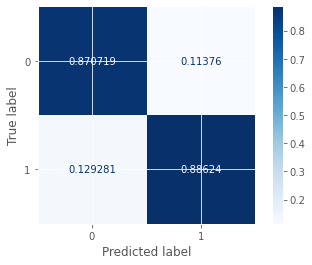

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = lstm.predict(X_test)

y_pre = np.array(list(map(lambda x: 1 if x>= 0.5 else 0, predictions)))
cm_lstm = confusion_matrix(y_test, y_pre, normalize='pred')
                 
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn)
disp.plot(cmap=plt.cm.Blues,values_format='g')

In [27]:
import plotly.graph_objects as go
fig = go.Figure()
trace0 = go.Scatter(x=[0, 1], y=[0, 1], name="Random", line = dict(width=3, dash='dash'))
trace1 = go.Scatter(x=fpr_snn, y=tpr_snn, name="SNN", line = dict(width=3))
trace2 = go.Scatter(x=fpr_cnn, y=tpr_cnn, name="CNN", line = dict(width=3))
trace3 = go.Scatter(x=fpr_lstm, y=tpr_lstm, name="LSTM", line = dict(width=3))
fig.add_trace(trace0)
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.update_traces(mode='lines')
fig.update_layout(title='Receiver Operating Characteristic (ROC)',
                   xaxis_title='False Positive Rate',
                   yaxis_title='True Positive Rate')

fig.show()

In [59]:
X_test0

33553    really liked summerslam due look arena curtain...
9427     many television shows appeal quite many differ...
199      film quickly gets major chase scene ever incre...
12447    jane austen would definitely approve one gwyne...
39489    expectations somewhat high went see movie thou...
                               ...                        
28567    although casper van dien michael rooker genera...
25079    liked movie really sure started watching it en...
18707    yes non singaporean can see what big deal film...
15200    far films go likable enough entertaining chara...
5857     saw anatomy years ago dubbed friends house rem...
Name: review, Length: 10000, dtype: object

In [67]:
matrix_train, res = train_test_split(movie_reviews, test_size=0.20,random_state=42)

In [68]:
res

review sentiment  word_count
33553  really liked summerslam due look arena curtain...  positive         116
9427   many television shows appeal quite many differ...  positive         193
199    film quickly gets major chase scene ever incre...  negative          65
12447  jane austen would definitely approve one gwyne...  positive          64
39489  expectations somewhat high went see movie thou...  negative         176
...                                                  ...       ...         ...
28567  although casper van dien michael rooker genera...  negative         117
25079  liked movie really sure started watching it en...  positive          33
18707  yes non singaporean can see what big deal film...  positive         111
15200  far films go likable enough entertaining chara...  negative          82
5857   saw anatomy years ago dubbed friends house rem...  positive          69

[10000 rows x 3 columns]

In [31]:
df = pd.DataFrame(list(zip(X_test0,y_test, y_pre,predictions)),
               columns =['review','sentiment','sentiment_pre','score'])
df

review  sentiment  \
0     really liked summerslam due look arena curtain...          1   
1     many television shows appeal quite many differ...          1   
2     film quickly gets major chase scene ever incre...          0   
3     jane austen would definitely approve one gwyne...          1   
4     expectations somewhat high went see movie thou...          0   
...                                                 ...        ...   
9995  although casper van dien michael rooker genera...          0   
9996  liked movie really sure started watching it en...          1   
9997  yes non singaporean can see what big deal film...          1   
9998  far films go likable enough entertaining chara...          0   
9999  saw anatomy years ago dubbed friends house rem...          1   

      sentiment_pre           score  
0                 0   [0.020354241]  
1                 1    [0.98494506]  
2                 0   [0.081965774]  
3                 1     [0.9858336]  
4                 0  [0.0120411515]  
...             ...             ...  
9995              0    [0.11527008]  
9996              1     [0.9853975]  
9997              1     [0.9740057]  
9998              0    [0.13038215]  
9999              1     [0.9800068]  

[10000 rows x 4 columns]

In [73]:
pos =  df['review'][df['sentiment_pre']==1]
neg =  df['review'][df['sentiment_pre']==0]

In [75]:
import itertools
import collections
import tweepy as tw
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
words_pos = pos.str.split()
# List of all words across tweets
list_pos = list(itertools.chain(*words_pos))
# Create counter
counts_pos = collections.Counter(list_pos)
counts_pos.most_common(15)

[('film', 8250),
 ('movie', 7311),
 ('one', 5419),
 ('like', 3486),
 ('good', 3112),
 ('it', 2820),
 ('the', 2730),
 ('great', 2531),
 ('time', 2487),
 ('story', 2475),
 ('see', 2438),
 ('well', 2391),
 ('also', 2169),
 ('would', 2164),
 ('really', 2044)]

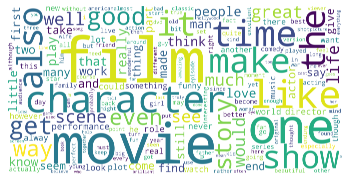

In [76]:
text = pos.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = '', width=8000,height=4000,min_font_size=30, background_color="white").generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [77]:
words_neg = neg.str.split()
# List of all words across tweets
list_neg = list(itertools.chain(*words_neg))

# Create counter
counts_neg = collections.Counter(list_neg)
counts_neg.most_common(15)

[('movie', 10482),
 ('film', 7687),
 ('one', 5227),
 ('like', 4596),
 ('even', 3157),
 ('it', 3063),
 ('bad', 3011),
 ('good', 2937),
 ('would', 2739),
 ('the', 2729),
 ('really', 2600),
 ('time', 2503),
 ('see', 2202),
 ('get', 2164),
 ('much', 2138)]

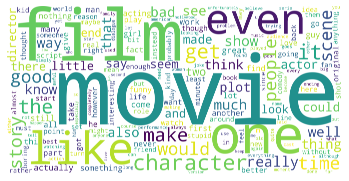

In [78]:
text = neg.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = '', width=8000,height=4000,min_font_size=30, background_color="white").generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

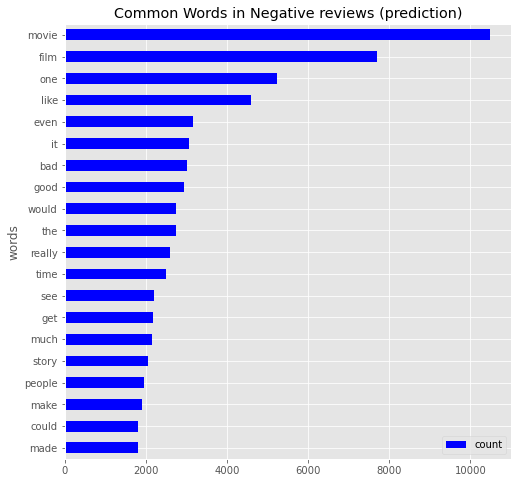

In [80]:
neg1 = pd.DataFrame(counts_neg.most_common(20),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
neg1.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                       color = 'b'               )
ax.set_title("Common Words in Negative reviews (prediction)")
plt.show()

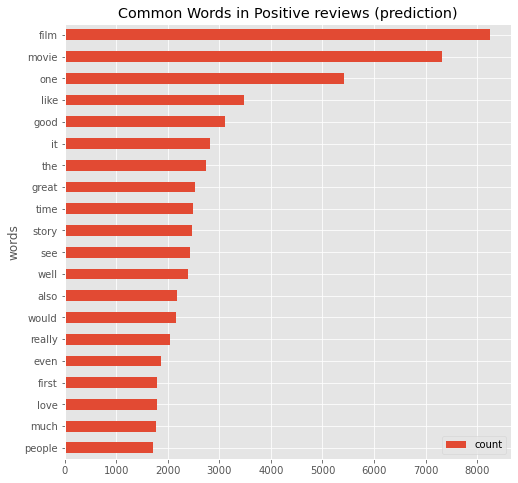

In [81]:
pos1 = pd.DataFrame(counts_pos.most_common(20),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
pos1.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax)
ax.set_title("Common Words in Positive reviews (prediction)")
plt.show()

In [6]:
X[33553]

'really liked summerslam due look arena curtains look overall interesting reason anyways could one best summerslam ever wwf lex luger main event yokozuna time ok huge fat man vs strong man m glad times changed terrible main event like every match luger terrible matches card razor ramon vs ted dibiase steiner brothers vs heavenly bodies shawn michaels vs curt hening event shawn named big monster body guard diesel irs vs kid bret hart first takes doink takes jerry lawler stuff harts lawler always interesting ludvig borga destroyed marty jannetty undertaker took giant gonzalez another terrible match smoking gunns tatanka took bam bam bigelow headshrinkers yokozuna defended world title lex luger match boring terrible ending however deserves '

In [43]:
movie_reviews['review'][8]

"Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only."

In [41]:
movie_reviews['review'][21]

'I had the terrible misfortune of having to view this "b-movie" in it\'s entirety.<br /><br />All I have to say is--- save your time and money!!! This has got to be the worst b-movie of all time, it shouldn\'t even be called a b-movie, more like an f-movie! Because it fails in all aspects that make a good movie: the story is not interesting at all, all of the actors are paper-thin and not at all believable, it has bad direction and the action sequences are so fake it\'s almost funny.......almost.<br /><br />The movie is just packed full of crappy one-liners that no respectable person could find amusing in the least little bit.<br /><br />This movie is supposed to be geared towards men, but all the women in it are SO utterly unattractive, especially that old wrinkled thing that comes in towards the end. They try to appear sexy in those weird, horrible costumes and they fail miserably!!!<br /><br />Even some of the most ridiculous b-movies will still give you some laughs, but this is jus

In [40]:
movie_reviews['sentiment'][21]

'negative'

In [15]:
pos =  movie_reviews['review'][movie_reviews['sentiment']=='postive']
neg =  movie_reviews['review'][movie_reviews['sentiment']=='negtive']

In [14]:
movie_reviews

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [17]:
pos.head()

Series([], Name: review, dtype: object)